In [13]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
df = pd.read_excel('KPMG_Data_1.xlsx')
df.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,39915.0
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,33455.0
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [15]:
# Only choose the order_status = Approved
df_status = df[(df['order_status'] == "Approved")]
df_status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19821 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19821 non-null  int64         
 1   product_id               19821 non-null  int64         
 2   customer_id              19821 non-null  int64         
 3   transaction_date         19821 non-null  datetime64[ns]
 4   online_order             19467 non-null  float64       
 5   order_status             19821 non-null  object        
 6   brand                    19625 non-null  object        
 7   product_line             19625 non-null  object        
 8   product_class            19625 non-null  object        
 9   product_size             19625 non-null  object        
 10  list_price               19821 non-null  float64       
 11  standard_cost            19625 non-null  float64       
 12  product_first_sold_date  19625 n

In [16]:
# drop duplicates
df_status.drop_duplicates



transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               354
order_status                 0
brand                      196
product_line               196
product_class              196
product_size               196
list_price                   0
standard_cost              196
product_first_sold_date    196
dtype: int64

In [17]:
# Function to parse day
def get_month(x): return dt.datetime(x.year, x.month, 1) 
# Creat TransactionMonth base on month of transaction_date
df_status['TransactionMonth'] = df_status['transaction_date'].apply(get_month)
# Grouping customer_id and choose the values of InvoiceMonth
grouping = df_status.groupby('customer_id')['TransactionMonth'] 
#  Assigning a minimum InvoiceMonth value to the dataset
df_status['CohortMonth'] = grouping.transform('min')
# printing top few rows
print(df_status.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date TransactionMonth  \
0       71.49     

C:\Users\thanh\AppData\Local\Temp\ipykernel_5956\1950588555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_status['TransactionMonth'] = df_status['transaction_date'].apply(get_month)
C:\Users\thanh\AppData\Local\Temp\ipykernel_5956\1950588555.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_status['CohortMonth'] = grouping.transform('min')


In [18]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, transaction_day = get_date_int(df_status, 'TransactionMonth')

# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(df_status, 'CohortMonth')

In [19]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year

# Calculate difference in months
months_diff = transaction_month - cohort_month

In [20]:
df_status['CohortIndex'] = years_diff * 12 + months_diff  + 1 
print(df_status.head(5))

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date TransactionMonth  \
0       71.49     

C:\Users\thanh\AppData\Local\Temp\ipykernel_5956\2105963851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_status['CohortIndex'] = years_diff * 12 + months_diff  + 1


In [23]:
 # Counting daily active user from each chort
grouping = df_status.groupby(['CohortMonth', 'CohortIndex'])



# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['customer_id'].apply(pd.Series.nunique).reset_index()


 # Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'customer_id')

# Printing top 5 rows of Dataframe
cohort_data.head(12)

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1347
1,2017-01-01,2,483
2,2017-01-01,3,505
3,2017-01-01,4,499
4,2017-01-01,5,492
5,2017-01-01,6,475
6,2017-01-01,7,513
7,2017-01-01,8,524
8,2017-01-01,9,489
9,2017-01-01,10,524


In [22]:
print(cohort_counts.round(1))

CohortIndex      1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                   
2017-01-01   1347.0  483.0  505.0  499.0  492.0  475.0  513.0  524.0  489.0   
2017-02-01    800.0  322.0  297.0  311.0  283.0  297.0  306.0  281.0  325.0   
2017-03-01    484.0  167.0  172.0  164.0  180.0  184.0  173.0  209.0  186.0   
2017-04-01    337.0  110.0  121.0  152.0  142.0  118.0  144.0  125.0  129.0   
2017-05-01    213.0   86.0   83.0   88.0   73.0   73.0   74.0   83.0    NaN   
2017-06-01    123.0   45.0   44.0   47.0   45.0   45.0   54.0    NaN    NaN   
2017-07-01     77.0   26.0   26.0   32.0   37.0   24.0    NaN    NaN    NaN   
2017-08-01     51.0   18.0   22.0   18.0   13.0    NaN    NaN    NaN    NaN   
2017-09-01     24.0    8.0    7.0    9.0    NaN    NaN    NaN    NaN    NaN   
2017-10-01     20.0    6.0    8.0    NaN    NaN    NaN    NaN    NaN    NaN   
2017-11-01     13.0    5.0    NaN    NaN    NaN    N

In [29]:
# Create the retention rate
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention_2 = retention.round(3)*100
retention_2

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.0,36.5,35.3,38.1,38.9,36.3,38.9,36.5,37.9
2017-02-01,100.0,40.2,37.1,38.9,35.4,37.1,38.2,35.1,40.6,38.2,36.5,NaN
2017-03-01,100.0,34.5,35.5,33.9,37.2,38.0,35.7,43.2,38.4,37.2,NaN,NaN
2017-04-01,100.0,32.6,35.9,45.1,42.1,35.0,42.7,37.1,38.3,NaN,NaN,NaN
2017-05-01,100.0,40.4,39.0,41.3,34.3,34.3,34.7,39.0,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.6,35.8,38.2,36.6,36.6,43.9,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,33.8,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,35.3,43.1,35.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,33.3,29.2,37.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


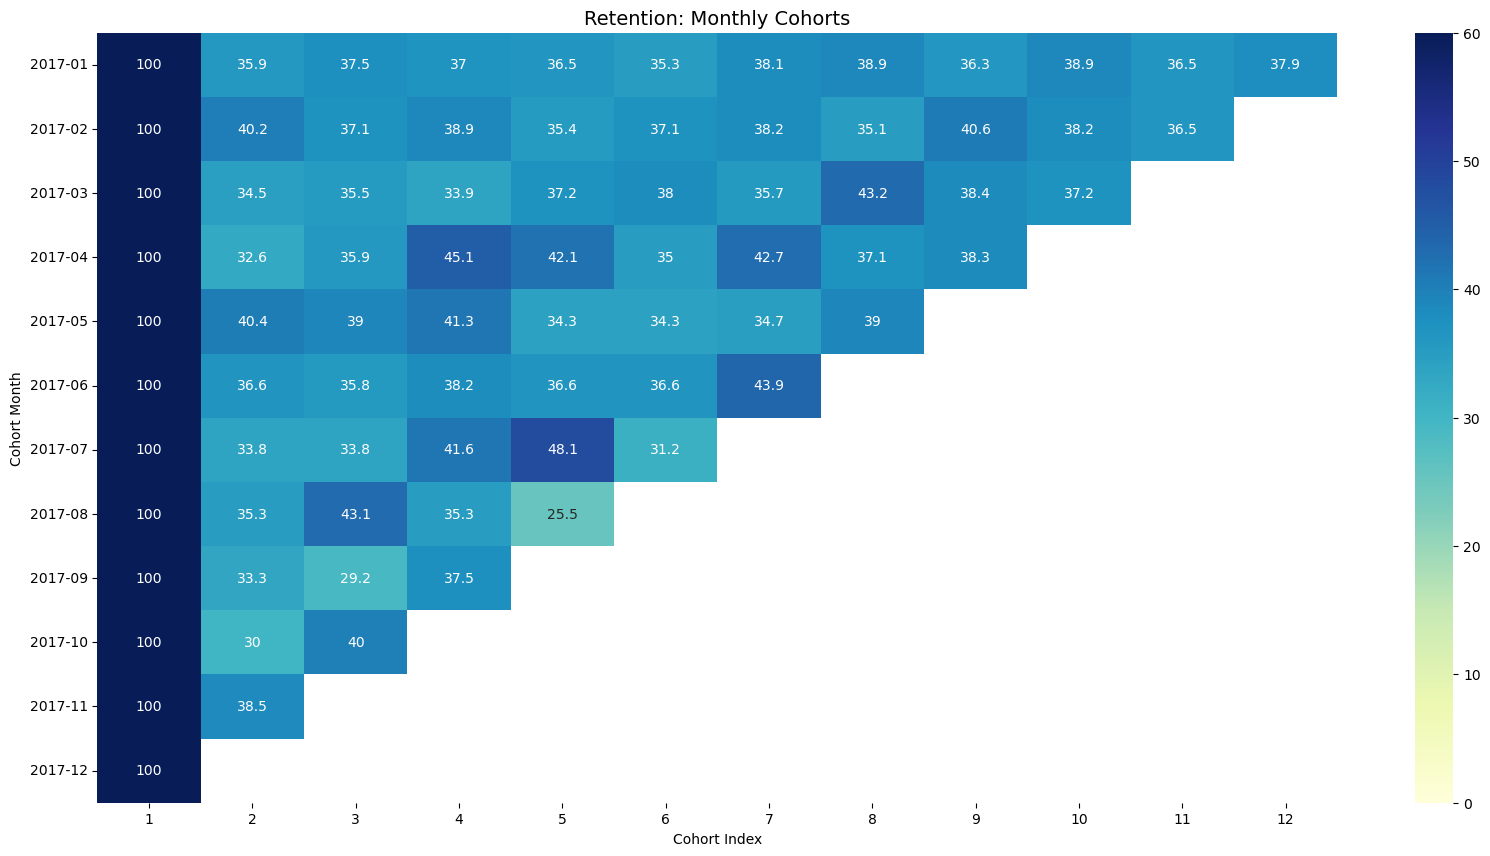

In [37]:
# Visualizing the retention rate
# retention_2.index = retention_2.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(20, 10))
# Adding a title
plt.title('Retention: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention_2, annot = True,vmin = 0.0, vmax =60,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()